Gunakan Library yang dibutuhkan untuk Scrapping dan Analisis

In [35]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from wordcloud import WordCloud
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
# nltk.download('punkt')

Setup URL yang akan digunakan untuk scrapping, beserta struktur yang akan digunakan

In [8]:
url = "https://garuda.kemdikbud.go.id/documents?page={}&q=artificial+intelligence"
mainurl = "https://garuda.kemdikbud.go.id"

df = pd.DataFrame.from_dict({
    'name': [],
    'published_at': [],
    'abstract': [],
    'publisher': [],
    'company_publisher': [],
    'creator': [],
    'category': [],
    'web_publisher': [],
    'link_publisher': [],
    # 'ris_citation': [], 
    # 'bibtex_citation': [], 
    # 'ori_source': [], 
    # 'ori_download': [], 
    # 'scholar': [],
})

for i in range(1):
    uri = f"{url.format(i)}"

    result = requests.get(url=uri).content
    doc = BeautifulSoup(result, "html.parser")
    article = doc.findAll('div', class_="article-item")

    for articles in article:
        articletitle = articles.find('a')
        href = articletitle.get('href')
        link_doc = mainurl + href
        spec = requests.get(url=link_doc).content

        journal = BeautifulSoup(spec, "html.parser")
        journal_name = journal.find('h3', class_="ui header").text
        journal_publish = journal.find('div', class_="four wide column").text
        journal_publish_clear = journal_publish.replace("\n", "")
        journal_abstract = journal.find('div', class_="abstract-article").text

        
        
        segment = journal.find_all("div", class_="ui segment")
        journal_writter_dump = journal.find('div', class_="ui segment article-display")
        journal_writter = journal_writter_dump.find('div')
        if journal_writter:
            middle_div = journal_writter.find('div')
            if middle_div:
                middle_a = middle_div.find('a').text
          
        # journal_writter_fix = journal_writter.find('a').text
        publisher = journal.find("div", class_="ui segment j-art-display")
        name_publisher_meta = publisher.find("div", class_="j-title")
        web_publisher_meta = publisher.find("div", class_="j-website")
        pub_publisher_meta = publisher.find("div", class_="j-pub-name")
        category_publisher_meta = publisher.find("a", class_="ui tag label grey mini")
        # if (category_publisher_meta is None):
        #     category_publisher_meta = ""
        name_publisher = name_publisher_meta.find("a").text
        web_publisher = web_publisher_meta.find("a")
        pub_publisher = pub_publisher_meta.find("a").text
        link_pub_publisher = pub_publisher_meta.find("a")

        web_publisher_fix = web_publisher['href']

        for div in segment:
            item_elements = div.find_all("div", class_="item")
            linked = []
            keys = ['ris_citation', 'bibtex_citation', 'ori_source', 'ori_download', 'scholar']
            for a in item_elements:
                anchor = a.find_all("a", class_="content")
                for index, link in enumerate(anchor):
                    href = link['href']
                    # print(href)
                    linked.append(href)
        
        new_list = [{key:value for key in keys} for value in linked]
        new_row = {'name': journal_name.replace("\n", ""),
            'published_at': journal_publish_clear.replace("Article InfoPublish Date", ""),
            'abstract': journal_abstract.replace("\n", ""),
            'publisher': name_publisher.replace("\n", ""),
            'company_publisher': pub_publisher.replace("\n", ""),
            'category': category_publisher_meta,
            'creator': middle_a,
            'web_publisher': web_publisher_fix.replace("\n", ""),
            'link_publisher': mainurl + link_pub_publisher['href'],
            # 'ris_citation': new_list[0]['ris_citation'],
            # 'bibtex_citation': new_list[0]['bibtex_citation'],
            # 'ori_source': new_list[0]['ori_source'],
            # 'ori_download': new_list[3]['ori_download'],
            # 'scholar': new_list[4]['scholar']
        }
        row_new_df = pd.DataFrame([new_row])
        df = pd.concat([df, row_new_df], ignore_index=True)

In [9]:
df.head()

,name,published_at,abstract,publisher,company_publisher,creator,category,web_publisher,link_publisher
0,Artificial Intelligence: Way Forward for India,01 Mar 2018,Artificial Intelligence (AI) is likely to tran...,IAES International Journal of Artificial Intel...,Institute of Advanced Engineering and Science,Sunil Kumar Srivastava,[Computer Science & IT],http://ijai.iaescore.com/index.php/IJAI,https://garuda.kemdikbud.go.id/publisher/view/6
1,Estimation of water quality index using artifi...,01 Mar 2020,Water quality index is a measure of water qual...,IAES International Journal of Artificial Intel...,Institute of Advanced Engineering and Science,Muhammad Sani Gaya,[Computer Science & IT],http://ijai.iaescore.com/index.php/IJAI,https://garuda.kemdikbud.go.id/publisher/view/6
2,AN INTRODUCTION TO KNOWLEDGE-GROWING SYSTEM: A...,05 Aug 2013,Bidang Kecerdasan Tiruan telah mengalami kemaj...,Proceedings of KNASTIK,Universitas Kristen Duta Wacana,"Sumari, Arwin Datumaya Wahyudi",None,http://ti.ukdw.ac.id/ojs/index.php/proceedings,https://garuda.kemdikbud.go.id/publisher/view/104
3,Implementasi Artificial Intelligence pada game...,31 Dec 2017,Game adalah jenis perangkat lunak yang populer...,Jurnal Teknik ITS,Institut Teknologi Sepuluh Nopember Surabaya,Billy Billy,[Engineering],http://ejurnal.its.ac.id/index.php/teknik,https://garuda.kemdikbud.go.id/publisher/view/102
4,Artificial Intelligence-Based Optimal PID Cont...,02 Jan 2020,This paper proposes the artificial intelligenc...,Indonesian Journal of Electrical Engineering a...,IAES Indonesia Section and Partners,Manoon Boonpramuk,[Computer Science & IT],http://section.iaesonline.com/index.php/IJEEI,https://garuda.kemdikbud.go.id/publisher/view/65


Simpan ke CSV / XLSX

In [10]:
df.to_csv('garuda_ai.csv', index=False)

In [8]:
df.to_excel('garuda_ml.xlsx', index=False)

VALUE COUNTS OF PUBLISHER

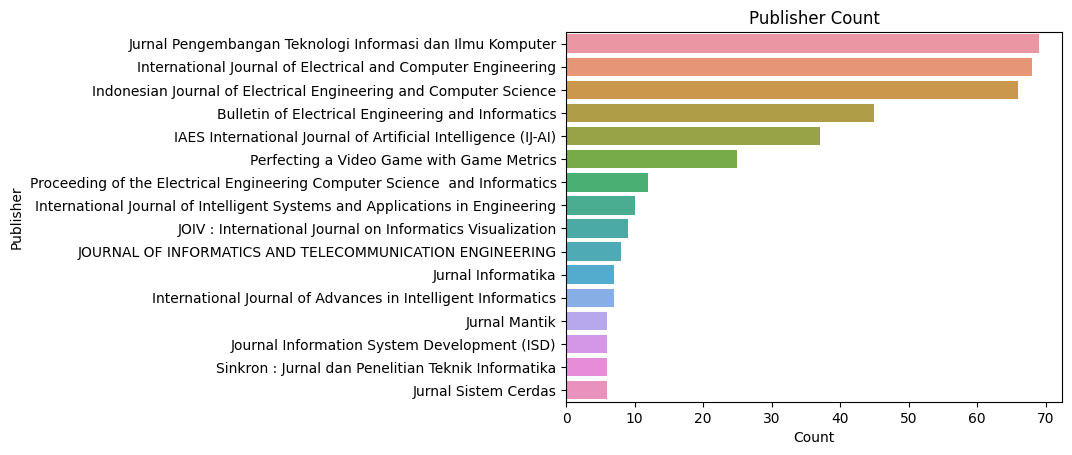

In [2]:
df = pd.read_csv("garuda_ml.csv")

publisher_count = df['publisher'].value_counts()
top_publisher = publisher_count[publisher_count>5]
sns.barplot(x=top_publisher.values, y = top_publisher.index)
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.title('Publisher Count')
plt.show()

In [14]:
df.head()

,name,published_at,abstract,publisher,company_publisher,creator,category,web_publisher,link_publisher
0,UNJUK KERJA METODE KLASIFIKASI SUPPORT VECTOR ...,10 Mar 2015,Face recognition techniques and classification...,Jurnal Ilmiah Sinus,STMIK Sinar Nusantara Surakarta,"Yustina Retno Wahyu Utami, Teguh Susyanto","<a class=""ui tag label grey mini"" href=""/area/...",https://p3m.sinus.ac.id/jurnal/index.php/e-jur...,https://garuda.kemdikbud.go.id/publisher/view/633
1,Software Defect Prediction Using Synthetic Min...,20 Feb 2020,Software testing is one of the crucial process...,Journal of Telematics and Informatics,IAES Indonesia Section and Partners,Khadijah Khadijah,"<a class=""ui tag label grey mini"" href=""/area/...",http://section.iaesonline.com/index.php/JTI,https://garuda.kemdikbud.go.id/publisher/view/65
2,Peramalan Beban Listrik Jangka Pendek Mengguna...,13 Sep 2012,Peramalan beban listrik jangka pendek merupaka...,Jurnal Teknik ITS,Institut Teknologi Sepuluh Nopember Surabaya,Januar Adi Perdana,"<a class=""ui tag label grey mini"" href=""/area/...",http://ejurnal.its.ac.id/index.php/teknik,https://garuda.kemdikbud.go.id/publisher/view/102
3,Rain Prediction Using Rule-Based Machine Learn...,01 May 2020,Rain prediction is an important topic that con...,"Advance Sustainable Science, Engineering and T...",Universitas PGRI Semarang,Muchamad Taufiq Anwar,"<a class=""ui tag label grey mini"" href=""/area/...",http://journal.upgris.ac.id/index.php/asset,https://garuda.kemdikbud.go.id/publisher/view/421
4,Prediction of 4f7-4f65d1 transition energy of ...,09 Apr 2020,In order to establish a method to predict the ...,"Advance Sustainable Science, Engineering and T...",Universitas PGRI Semarang,Hiroyuki Hori,"<a class=""ui tag label grey mini"" href=""/area/...",http://journal.upgris.ac.id/index.php/asset,https://garuda.kemdikbud.go.id/publisher/view/421


VALUES COMPANY PUBLISHER

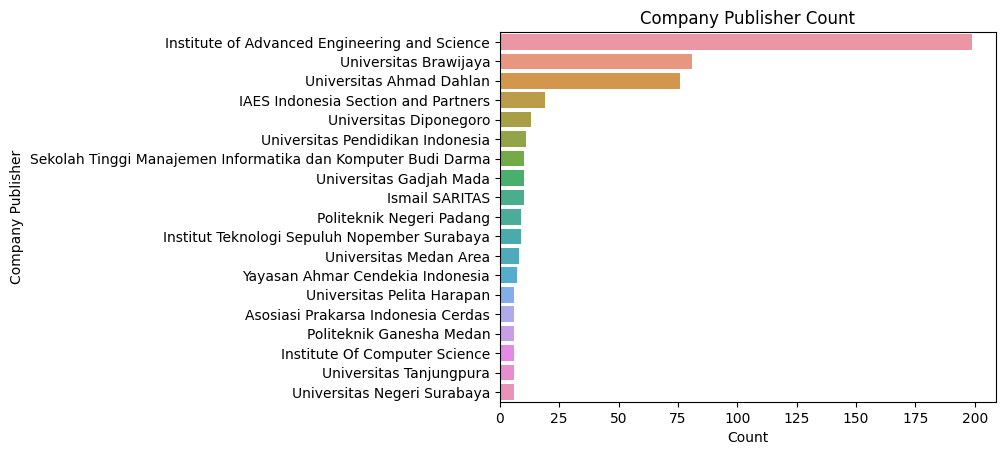

In [3]:
company_publisher_count = df['company_publisher'].value_counts()
top_company_publisher_count = company_publisher_count[company_publisher_count>5]
sns.barplot(x=top_company_publisher_count.values, y = top_company_publisher_count.index)
plt.xlabel('Count')
plt.ylabel('Company Publisher')
plt.title('Company Publisher Count')
plt.show()

ABSTRACT ANALYSIS

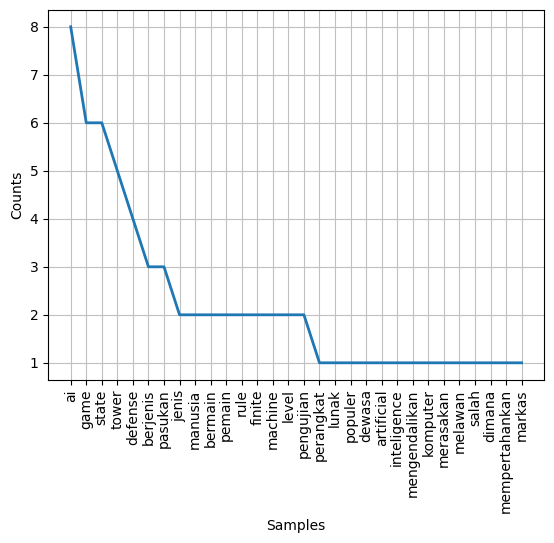

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:

text = str(df['abstract'][3])

tokens = word_tokenize(text=text, language="english")
lower_tokens = [word.lower() for word in tokens]
alpha_only = [t for t in lower_tokens if t.isalpha()]
no_stops = [t for t in alpha_only if t not in stopwords.words('indonesian') and t not in stopwords.words('english') ]
# Counter(no_stops).most_common(10)
freq_word = FreqDist(no_stops)
freq_word.plot(30)

WORDCLOUD

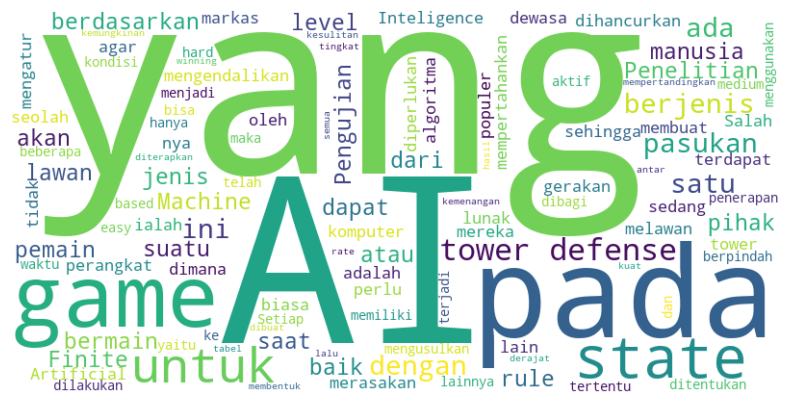

In [29]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
ps = PorterStemmer()
for w in no_stops:
    rootWord = ps.stem(w)
    print(f"{w} : {rootWord}")

game : game
jenis : jeni
perangkat : perangkat
lunak : lunak
populer : popul
dewasa : dewasa
game : game
artificial : artifici
inteligence : intelig
ai : ai
mengendalikan : mengendalikan
komputer : komput
manusia : manusia
bermain : bermain
merasakan : merasakan
melawan : melawan
pemain : pemain
manusia : manusia
bermain : bermain
salah : salah
jenis : jeni
game : game
tower : tower
defense : defens
dimana : dimana
pemain : pemain
mempertahankan : mempertahankan
tower : tower
markas : marka
nya : nya
dihancurkan : dihancurkan
lawan : lawan
ai : ai
game : game
berjenis : berjeni
tower : tower
defense : defens
algoritma : algoritma
mengatur : mengatur
gerakan : gerakan
pasukan : pasukan
mengusulkan : mengusulkan
penerapan : penerapan
ai : ai
game : game
berjenis : berjeni
tower : tower
defense : defens
rule : rule
based : base
finite : finit
state : state
machine : machin
pasukan : pasukan
memiliki : memiliki
ai : ai
state : state
kondisi : kondisi
pasukan : pasukan
berpindah : berpindah

In [42]:
# assign documents
d0 = 'ikan ikan suka makan nasi'
d1 = 'ikan kucing makan makan'
d2 = 'kucing makan nasi nasi'
d3 = 'ikan makan nasi dan kucing minum air'

# merge documents into a single corpus
string = [d0, d1, d2, d3]

# create object
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(string)

# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
	print(ele1, ':', ele2)

# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())



idf values:
air : 1.916290731874155
dan : 1.916290731874155
ikan : 1.2231435513142097
kucing : 1.2231435513142097
makan : 1.0
minum : 1.916290731874155
nasi : 1.2231435513142097
suka : 1.916290731874155

Word indexes:
{'ikan': 2, 'suka': 7, 'makan': 4, 'nasi': 6, 'kucing': 3, 'dan': 1, 'minum': 5, 'air': 0}

tf-idf value:
  (0, 6)	0.35086766617527515
  (0, 4)	0.28685730779374546
  (0, 7)	0.5497020002955263
  (0, 2)	0.7017353323505503
  (1, 3)	0.46256390641804784
  (1, 4)	0.7563526062350489
  (1, 2)	0.46256390641804784
  (2, 3)	0.42001929578104674
  (2, 6)	0.8400385915620935
  (2, 4)	0.34339329617505315
  (3, 0)	0.47169026319108903
  (3, 5)	0.47169026319108903
  (3, 1)	0.47169026319108903
  (3, 3)	0.3010737849134322
  (3, 6)	0.3010737849134322
  (3, 4)	0.24614754710511505
  (3, 2)	0.3010737849134322

tf-idf values in matrix form:
[[0.         0.         0.70173533 0.         0.28685731 0.
  0.35086767 0.549702  ]
 [0.         0.         0.46256391 0.46256391 0.75635261 0.
  0.         